# Fandango Movie Ratings Investigations

## Background
**In 2015, a Journalist named Hickey claimed that movie ratings on Fandago are baised and kinda cheatful, due to lots of movies recieved very high scores. He collected thsos movies recieved more than 30 reviews as his sample**

## Goal:
**Use two data sets which reflect seperate review score prior to, and after Hickey's claim to see if there is a difference between them. As Fandago promised to fif it's systems's bug which is the main reason, according to their claims, casue this problem.**<br><br>
**If this is true, then ratings recieved in 2016 should be lower than those in 2015, more or less**

## Datasets:
**Dataset 1: Will use the same dataset that Hickey use to run his analysis, which was being made publicly <a href="https://github.com/fivethirtyeight/data/tree/master/fandango">Here</a>**<br><br>
**Datasets 2: I collected the datasets from a publiv github made my dataquest team, which can be found <a href="https://github.com/mircealex/Movie_ratings_2016_17">here</a>, its's called "movie_ratings_16_17.csv"**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
previous=pd.read_csv("fandango_score_comparison.csv")
after=pd.read_csv("movie_ratings_16_17.csv")

In [3]:
previous.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


In [4]:
after.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


**Isolate the columns to get columns that we want analyze**

In [5]:
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes',
                             'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [6]:
fandango_after.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


## Define the scope: 
**Time : only look into films being shot in 2015 and 2016**<br>
**Popularity: Same standard as Hickey's: movies with 30 or more ratings** 

In [7]:
sum(fandango_previous['Fandango_votes']<30)

0

**Extract the year Information from the previous dataset**

In [8]:
fandango_previous['Year']=fandango_previous['FILM'].str[-5:-1]

In [9]:
fandango_previous.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [10]:
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [11]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

**Isolate the movies released in 2015 in a separate data set**

In [12]:
f_2015=fandango_previous[fandango_previous['Year']=='2015']
f_2016=fandango_after[fandango_after['year']==2016]

In [13]:
f_2015.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


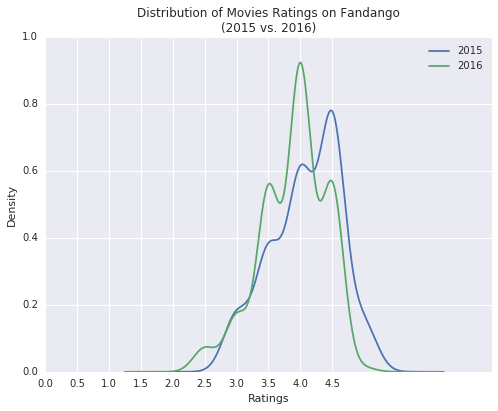

In [14]:
f_2015['Fandango_Stars'].plot.kde(label='2015',figsize=(8,6),legend=True)
f_2016['fandango'].plot.kde(label='2016',legend=True)
plt.title("Distribution of Movies Ratings on Fandango\n(2015 vs. 2016)")
plt.xlim(0)
plt.xlabel("Ratings")
plt.xticks(np.arange(0,5,0.5))
plt.show()

2016 distributioon is slightly left-shifted compare to 2015's, there is indeed an  evidence suggesting that 2015's ratings are bit higher

# Analyze Relative Frequencies

**2015**

In [15]:
print("Total Number: ",len(f_2015))
f_2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100

Total Number:  129


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

**2016**

In [16]:
print("Total Number: ",len(f_2016))
f_2016['fandango'].value_counts(normalize=True).sort_index()*100

Total Number:  191


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

**Create Intervals to bin the data for both years**

In [17]:
def bin_data(dataframe):
    
    intervals=pd.interval_range(start=2, end=5, freq=0.5)
    freq_table=pd.Series([0]*6,index=intervals)
    
    if 'Fandango_Stars' in dataframe.columns: 
        for value in dataframe['Fandango_Stars']:
            for interval in  intervals:
                if value in interval:
                    freq_table.loc[interval] +=1
                    break
   
                    
    elif 'fandango' in dataframe.columns:
        for value in dataframe['fandango']:
            for interval in intervals:
                if value in interval:
                    freq_table.loc[interval] +=1
                    break
                    
    return freq_table
        


In [18]:
bin_data(f_2015)

(2.0, 2.5]     0
(2.5, 3.0]    11
(3.0, 3.5]    23
(3.5, 4.0]    37
(4.0, 4.5]    49
(4.5, 5.0]     9
dtype: int64

In [19]:
bin_data(f_2016)

(2.0, 2.5]     6
(2.5, 3.0]    14
(3.0, 3.5]    46
(3.5, 4.0]    77
(4.0, 4.5]    47
(4.5, 5.0]     1
dtype: int64

**Conclusion**<br>
Movies with ratings 5.0 are less in 2016<br>
Movies with ratings 4.5 are less in 2016<br>
Minimum ratings are also lower

**Use Box Plot to better visualize results**

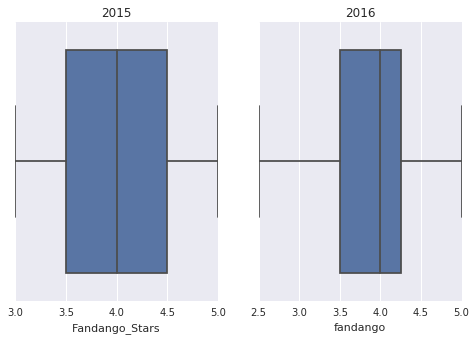

In [20]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(8,5))
sns.boxplot(data=f_2015, x='Fandango_Stars', ax=ax[0])
sns.boxplot(data=f_2016, x='fandango', ax=ax[1])

ax[0].set_title("2015")
ax[1].set_title("2016")

plt.show()

From what can be tell from the boxplot, the median remain same, 2016's range is more narrowed

In [21]:
#Mean Value
mean_2015=f_2015['Fandango_Stars'].mean()
mean_2016=f_2016['fandango'].mean()
print("Mean Value for 2015: ",mean_2015)
print("Mean Value for 2016: ",mean_2016)

Mean Value for 2015:  4.0852713178294575
Mean Value for 2016:  3.887434554973822


In [22]:
#Median
median_2015=f_2015['Fandango_Stars'].median()
median_2016=f_2016['fandango'].median()
print("Median Value for 2015: ",median_2015)
print("Median Value for 2016: ",median_2016)

Median Value for 2015:  4.0
Median Value for 2016:  4.0


In [25]:
mode_2015=f_2015['Fandango_Stars'].mode()[0]
mode_2016=f_2016['fandango'].mode()[0]
print("Mode for 2015: ",mode_2015)
print("Mode for 2016: ",mode_2016)

Mode for 2015:  4.5
Mode for 2016:  4.0


In [47]:
data=[[mean_2015,mean_2016],[median_2015,median_2016],[mode_2015,mode_2016]]
index=['Average','Median','Mode']
columns=['2015', '2016']

conclusion=pd.DataFrame(data=data, index=index,columns=columns)

conclusion

,2015,2016
Average,4.085271,3.887435
Median,4.000000,4.000000
Mode,4.500000,4.000000


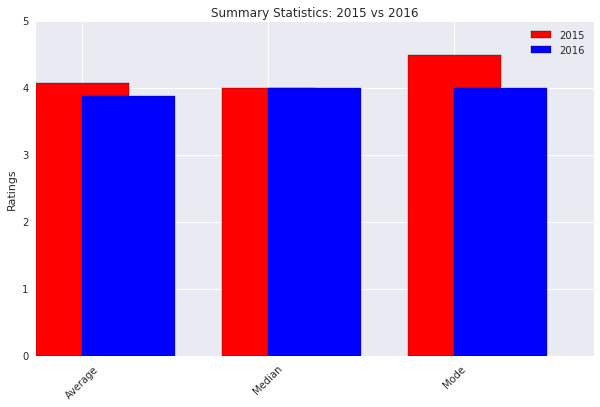

In [51]:
conclusion['2015'].plot.bar(figsize=(10,6),rot=45,label='2015', legend=True, align='center',color='r')
conclusion['2016'].plot.bar(figsize=(10,6),rot=45,label='2016', legend=True, align='edge',color='b')

plt.title("Summary Statistics: 2015 vs 2016")
plt.ylim(0,5.0)
plt.ylabel("Ratings")
plt.show()

# Conclusion:
** After Hickey's report, there is indeed a donwtrend regarding movies ratings on Fandago, average score for films released in 2016 is lower compare to those 2015, so is the mode**